In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [37]:
features=['points','price']
target = ['variety']

In [39]:
df=pd.read_csv('wine_review_train_clean.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulk√† Bianco,87,34.998642,Sicily & Sardinia,Etna,Kerin O‚ÄôKeefe,Nicosia 2013 Vulk√† Bianco (Etna),White Blend,Nicosia
1,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
2,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
3,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.000000,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
4,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.000000,Sicily & Sardinia,Vittoria,Kerin O‚ÄôKeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo


In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df[features]),
                 columns=features)
df_sc.head()

/home/vagrant/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,points,price
0,0.35,0.015430
1,0.35,0.004480
2,0.35,0.030363
3,0.35,0.005475
4,0.35,0.005973


In [41]:
#PCA

In [42]:
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df[features]),
                     columns=features)
df_pca.head()

,points,price
0,-4.020691,1.833106
1,-26.004173,1.016526
2,25.959990,2.946745
3,-24.005551,1.090765
4,-23.006240,1.127885


In [43]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.99432581, 0.00567419])

In [44]:
df_pca['variety'] = df[target]
df_pca.columns = ['PC1', 'PC2','variety']
df_pca.head()

,PC1,PC2,variety
0,-4.020691,1.833106,White Blend
1,-26.004173,1.016526,Riesling
2,25.959990,2.946745,Pinot Noir
3,-24.005551,1.090765,Tempranillo-Merlot
4,-23.006240,1.127885,Frappato


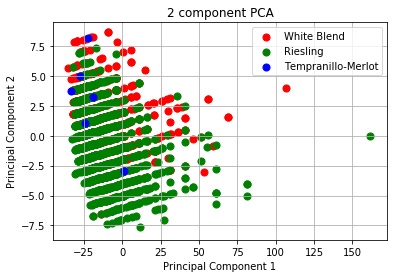

In [48]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = ['White Blend', 'Riesling', 'Tempranillo-Merlot']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = df_pca['variety'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'PC1']
    , df_pca.loc[indicesToKeep, 'PC2']
    , c = color
    , s = 50)
ax.legend(targets)
ax.grid()

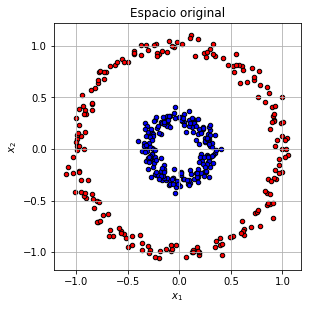

In [49]:
np.random.seed(0)
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Espacio original")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid()

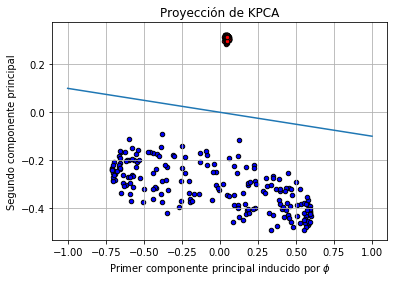

In [50]:
kpca = KernelPCA(kernel = "rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X)

plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",s=20, edgecolor='k')
x = np.linspace(-1, 1, 1000)
plt.plot(x, -0.1*x, linestyle="solid")
plt.title("Proyección de KPCA")
plt.xlabel("Primer componente principal inducido por $\phi$")
plt.ylabel("Segundo componente principal")
plt.grid()